## Cardiac Arrest Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"]=(20,10)

## Load the given dataset

In [2]:
df=pd.read_csv('Project_11_Clustering_Arrest_Data.csv')
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


## Describe the data

In [3]:
df.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Count unique value in UnderRisk Column

In [4]:
df.UnderRisk.value_counts()

no     699
yes    190
Name: UnderRisk, dtype: int64

## check the count of null values in dataset column

In [5]:
df.isna().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

## Drop under risk column

In [6]:
df.drop('UnderRisk',axis=1,inplace=True)

## Kmean clustering

In [7]:
from sklearn.cluster import KMeans,DBSCAN

In [8]:
km=KMeans(n_clusters=3)

In [9]:
y_pred=km.fit_predict(df)

In [10]:
df['cluster']=y_pred
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,cluster
0,1,1,1,0,1,0,0,0,1,0,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,0,0,0
3,1,0,1,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0,1


In [11]:
# df.cluster.value_counts()

In [12]:
km.cluster_centers_

array([[ 9.62003454e-01,  1.51986183e-01,  8.37651123e-01,
         1.01899827e-01,  1.00000000e+00,  6.56303972e-02,
         1.72711572e-03, -3.19189120e-16,  9.65457686e-01,
         2.76338515e-02,  2.76338515e-02,  3.28151986e-02],
       [ 1.19444444e+00,  5.55555556e-02,  5.97222222e-01,
         5.55555556e-02, -2.22044605e-16,  5.55555556e-02,
         5.13888889e-01,  1.00000000e+00,  5.27777778e-01,
        -6.93889390e-18,  1.38888889e-02,  2.77777778e-02],
       [ 2.00000000e+00,  6.30252101e-02,  9.11764706e-01,
         5.88235294e-02,  1.00000000e+00,  2.94117647e-02,
        -3.46944695e-17,  4.20168067e-03,  9.49579832e-01,
         3.46944695e-18,  8.40336134e-03,  3.36134454e-02]])

### silhouette score

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
silhouette_score(df,y_pred)

0.6500051963425098

In [15]:
df.drop('cluster',axis=1,inplace=True)

In [16]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 10): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df) 
    wcss.append(kmeans.inertia_)

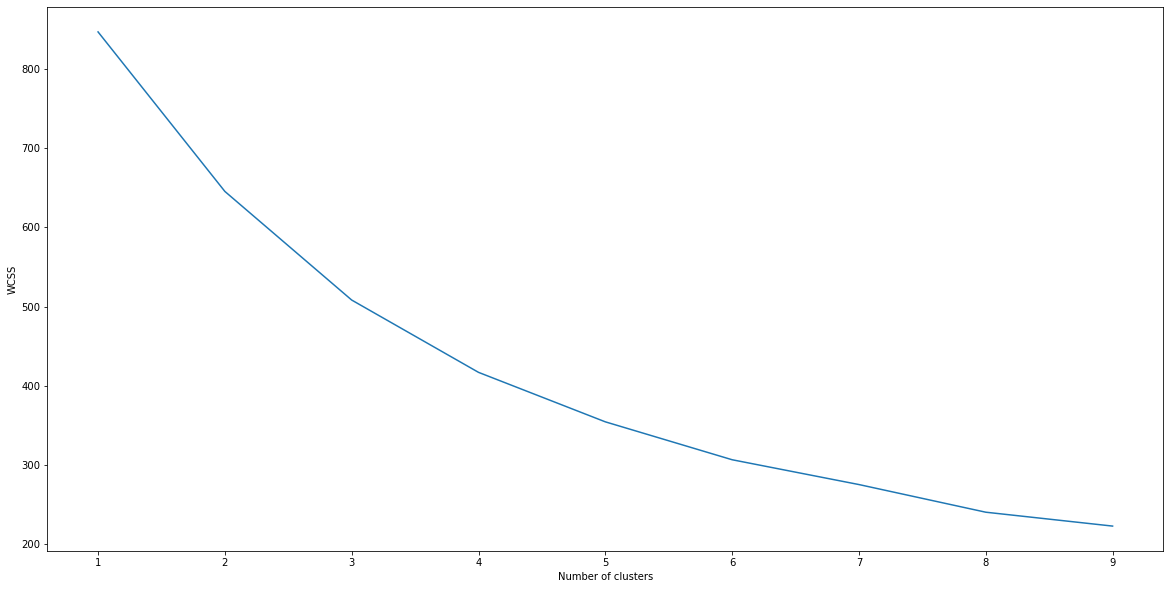

In [17]:
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

### Plot the Dendrogram using scipy

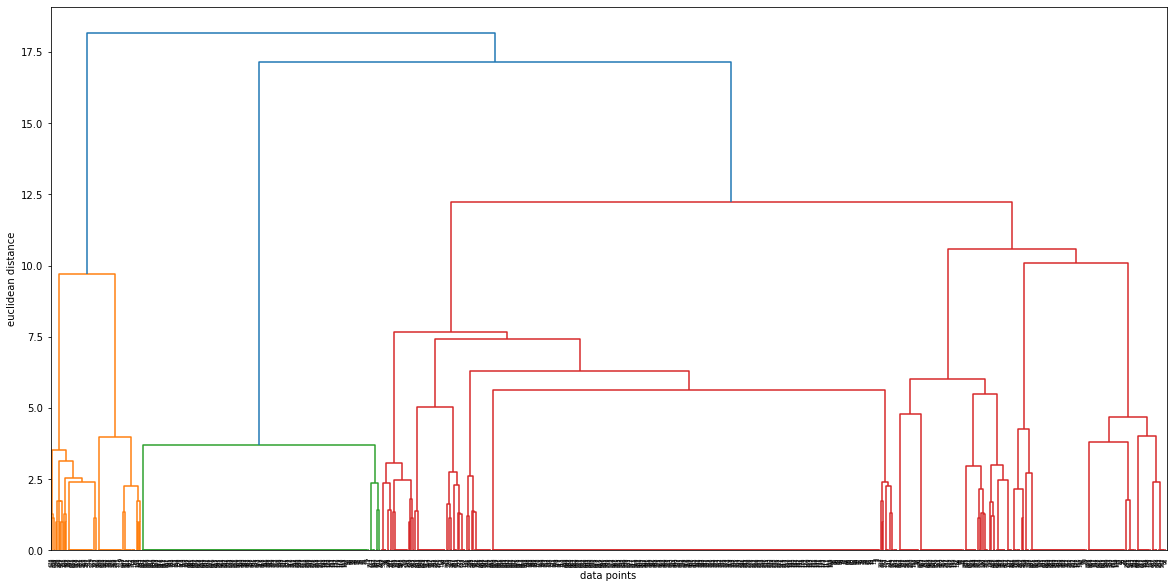

In [18]:
df=pd.read_csv('Project_11_Clustering_Arrest_Data.csv')
df.drop(['UnderRisk'], axis=1, inplace=True)
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

## hierarchical clustering

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
hc = AgglomerativeClustering(n_clusters=2)
y_pred2=hc.fit_predict(df)

In [21]:
df['lable']=y_pred2
df

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,lable
0,1,1,1,0,1,0,0,0,1,0,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,0,0,0
3,1,0,1,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2,0,1,0,1,0,0,0,1,0,0,0,0
885,1,0,1,0,1,0,0,0,1,0,0,0,0
886,1,0,0,1,1,0,0,0,1,0,0,0,0
887,2,0,1,0,0,0,0,1,1,0,0,0,1


In [22]:
df.lable.value_counts()

0    817
1     72
Name: lable, dtype: int64

## silhouette score

In [23]:
silhouette_score(df,y_pred2)

0.5390208253186523

In [24]:
df.drop('lable', axis=1, inplace=True)

## DBSCAN Cluster

In [25]:
db=DBSCAN()
db.fit(df)


DBSCAN()

In [26]:
y_pred2=db.fit_predict(df)
# y_pred2

In [27]:
df['db_cluster']=y_pred2
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,db_cluster
0,1,1,1,0,1,0,0,0,1,0,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0,1
2,1,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,1,1,0,0,0,0,2


In [28]:
silhouette_score(df,y_pred2)

0.9019397437280235

In [29]:
df.db_cluster.value_counts()

 1     310
 3     182
-1      85
 0      46
 6      36
 10     30
 7      24
 2      21
 4      20
 8      17
 19     14
 15     12
 5      12
 22     10
 11     10
 23      8
 18      7
 20      7
 12      7
 16      6
 14      5
 17      5
 13      5
 21      5
 9       5
Name: db_cluster, dtype: int64